## Probabilistic Model Selection / In-Sample Model Selection

From a probabilistic perspective we seek the model estimate $\widehat{f}$ that is most probable given the data. Let $H_f$ be the hypothesis that a specific model is the correct model and $p(D)$ represent the probability of the data, then we seek $\widehat{f}$ that maximizes, that is we seek 

$$\widehat{f} = \underset{f}{\mathrm{argmax}}\left(p(H_f|D)\right)$$

We can use Bayes' Rule to invert this probability so that

$$\widehat{f} = \underset{f}{\mathrm{argmax}}\left(\frac{p(D|H_f)p(H_f)}{p(D)}\right)$$

If we consider that each model is equally likely and that the probability of the data $p(D)$ is a constant applied to every calculation, then without loss of generality, we can say 

$$\widehat{f} = \underset{f}{\mathrm{argmax}}\left(p(D|H_f)\right)$$

In the Regression setting, it can be shown that maximizing this equation is equivalent to minimizing the residual sum of squares, 

$$\text{RSS} = \sum (y_i - \widehat{y})^2 = (\mathbf{y} -\mathbf{\widehat{y}})^T(\mathbf{y} -\mathbf{\widehat{y}})$$

#### Generating Model Hypotheses

For this particular task we will consider the hypothesis space to be all of the linear models possible given our data sets. If we recognize that the set of all of the models possible with `dataset_1` is a subset of all of the models possible with `dataset_2` and likewise with `dataset_3` and `dataset_4`, then we can take the size of this hypothesis space to be all of the possible models made using `dataset_2` and all of the possible models made using `dataset_4`.

This is a vast space. 

To get a sense of the size of this hypothesis space, let us consider a simpler data set, one that has just two features, $x_1$ and $x_2$. We note that there are four possible models using these two features:

\begin{align*}
\widehat{f}_1 &= \beta_0 \\
\widehat{f}_2 &= \beta_0 + \beta_1x_1\\
\widehat{f}_3 &= \beta_0 + \beta_1x_2\\
\widehat{f}_4 &= \beta_0 + \beta_1x_1 + \beta_2x_2\\
\end{align*}

Similarly for a data set with three features, there will be eight possible models:

\begin{align*}
\widehat{f}_1 &= \beta_0 \\
\widehat{f}_2 &= \beta_0 + \beta_1x_1\\
\widehat{f}_3 &= \beta_0 + \beta_1x_2\\
\widehat{f}_4 &= \beta_0 + \beta_1x_3\\
\widehat{f}_5 &= \beta_0 + \beta_1x_1 + \beta_2x_2\\
\widehat{f}_6 &= \beta_0 + \beta_1x_1 + \beta_2x_3\\
\widehat{f}_7 &= \beta_0 + \beta_1x_2 + \beta_2x_3\\
\widehat{f}_8 &= \beta_0 + \beta_1x_1 + \beta_2x_2+ \beta_3x_3\\
\end{align*}

Essentially we are forming what is known as a Power Set of possible feature combinations. The number of elements in a Power Set is given by $2^p$ where $p$ is the number of elements in the set. 

For $p=2$, this is four models.
For $p=3$, this is eight models.

For $p=100$, this is a hypothesis space With a dimension of $1.27\times10^{30}$. If we trained one model per second, it would take us $4.02\times10^{22}$ years to search the entire hypothesis space. For perspective, physicists estimate that the universe is approximately $13.8\times10^{9}$ years old.

In other words, we will rarely be able to exhaustively search a hypothesis space.

In [1]:
iris.data = read.csv("data/iris.csv", row.names='X')

In [2]:
head(iris.data)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [3]:
install.packages("GGally")

also installing the dependencies ‘progress’, ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
library(GGally)

Loading required package: ggplot2


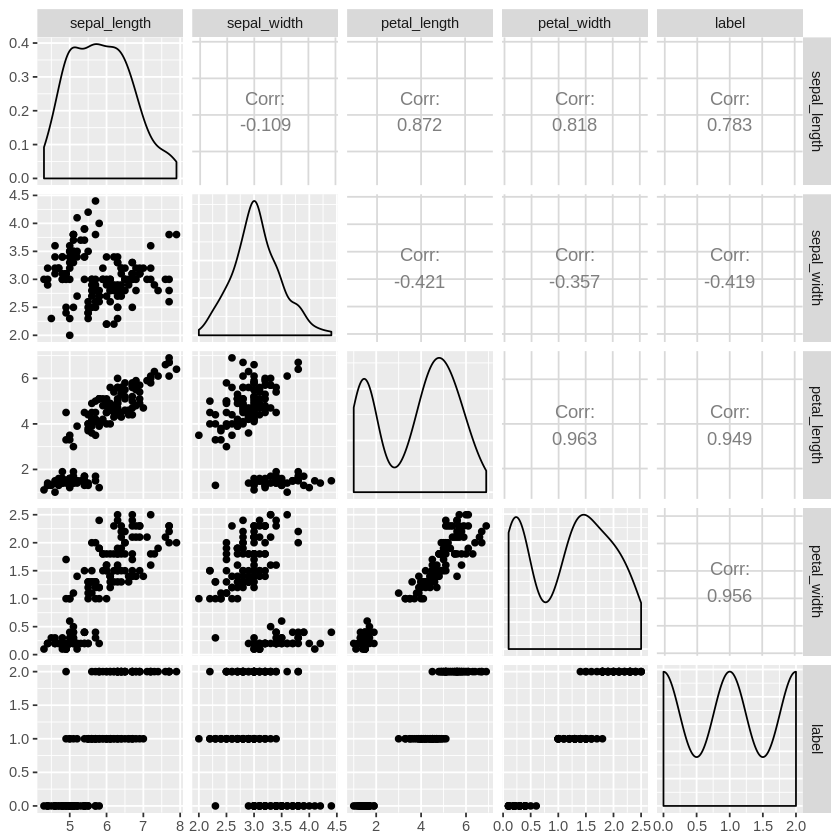

In [5]:
ggpairs(iris.data)

In [6]:
iris.glm = glm("label ~ 1 + sepal_length + sepal_width + petal_length + petal_width", data = iris.data)
summary(iris.glm)


Call:
glm(formula = "label ~ 1 + sepal_length + sepal_width + petal_length + petal_width", 
    data = iris.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.59046  -0.15230   0.01338   0.10332   0.55061  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.19208    0.20470   0.938 0.349611    
sepal_length -0.10974    0.05776  -1.900 0.059418 .  
sepal_width  -0.04424    0.05996  -0.738 0.461832    
petal_length  0.22700    0.05699   3.983 0.000107 ***
petal_width   0.60989    0.09447   6.456 1.52e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.04798457)

    Null deviance: 100.0000  on 149  degrees of freedom
Residual deviance:   6.9578  on 145  degrees of freedom
AIC: -22.935

Number of Fisher Scoring iterations: 2


### The Log-Likelihood

Without going too far into the math, we can think of the log-likelihood as a **likelihood function** telling us how likely a model is given the data. 

This value is not human interpretable but is useful as a comparison.

In [7]:
logLik(iris.glm)

'log Lik.' 17.46751 (df=6)

"All models are wrong, but some are useful." - George Box

We might be concerned with one additional property - the **complexity** of the model. 

##### William of Occam

[**Occam's razor**](https://en.wikipedia.org/wiki/Occam's_razor) is the problem-solving principle that, when presented with competing hypothetical answers to a problem, one should select the one that makes the fewest assumptions.

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ab/William_of_Ockham_-_Logica_1341.jpg" width=400px>

We can represent this idea of complexity in terms of both the number of features we use and the amount of data.

## Bayesian Information Criterion

https://en.wikipedia.org/wiki/Bayesian_information_criterion

The BIC is formally defined as

$$ \mathrm{BIC} = {\ln(n)k - 2\ln({\widehat L})}. $$

where

- $\widehat L$ = the maximized value of the likelihood function of the model $M$
- $x$ = the observed data
- $n$ = the number of data points in $x$, the number of observations, or equivalently, the sample size;
- $k$ = the number of parameters estimated by the model. For example, in multiple linear regression, the estimated parameters are the intercept, the $q$ slope parameters, and the constant variance of the errors; thus, $k = q + 2$.


It might help us to think of it as 

$$ \mathrm{BIC} = \text{complexity}-\text{likelihood}$$

## Akaike Information Criterion


https://en.wikipedia.org/wiki/Akaike_information_criterion

The AIC is formally defined as

$$ \mathrm{AIC} = {2k - 2\ln({\widehat L})}. $$

where

- $\widehat L$ = the maximized value of the likelihood function of the model $M$
- $x$ = the observed data
- $n$ = the number of data points in $x$, the number of observations, or equivalently, the sample size;
- $k$ = the number of parameters estimated by the model. For example, in multiple linear regression, the estimated parameters are the intercept, the $q$ slope parameters, and the constant variance of the errors; thus, $k = q + 2$.


It might help us to think of it as 

$$ \mathrm{AIC} = \text{complexity}-\text{likelihood}$$

We can think of - likelihood as bias and complexity as variance.

In [8]:
BIC(iris.glm)

[1] -4.871215

In [9]:
n = length(iris.glm$fitted.values)
p = length(coefficients(iris.glm))

likelihood = 2 * logLik(iris.glm)
complexity = log(n)*(p+1)

bic = complexity - likelihood
bic

'log Lik.' -4.871215 (df=6)

In [10]:
BIC_of_model = function (model) {
    n = length(model$fitted.values)
    p = length(coefficients(model))

    likelihood = 2 * logLik(model)
    complexity = log(n)*(p+1)

    bic = complexity - likelihood
    return(bic)
}

In [11]:
BIC_of_model(iris.glm)

'log Lik.' -4.871215 (df=6)

## Model Selection

Here, we choose the optimal model by removing features one by one.

In [12]:
model_1  = "label ~ 1 + sepal_length + sepal_width + petal_length + petal_width"
model_2a = "label ~ 1 + sepal_length + sepal_width + petal_length"
model_2b = "label ~ 1 + sepal_length + sepal_width                + petal_width"
model_2c = "label ~ 1 + sepal_length               + petal_length + petal_width"
model_2d = "label ~ 1                + sepal_width + petal_length + petal_width"

In [13]:
iris.glm.1 = glm(model_1, data=iris.data)
iris.glm.2a = glm(model_2a, data=iris.data)
iris.glm.2b = glm(model_2b, data=iris.data)
iris.glm.2c = glm(model_2c, data=iris.data)
iris.glm.2d = glm(model_2d, data=iris.data)

In [14]:
print(c('model_1', BIC_of_model(iris.glm.1)))
print(c('model_2a', BIC_of_model(iris.glm.2a )))
print(c('model_2b', BIC_of_model(iris.glm.2b )))
print(c('model_2c', BIC_of_model(iris.glm.2c )))
print(c('model_2d', BIC_of_model(iris.glm.2d )))

[1] "model_1"           "-4.87121487462612"
[1] "model_2a"         "28.0137935908893"
[1] "model_2b"         "5.69337438932066"
[1] "model_2c"          "-9.31979403027607"
[1] "model_2d"         "-6.1930960954627"


In [15]:
print(c('model_1', BIC(iris.glm.1)))
print(c('model_2a', BIC(iris.glm.2a )))
print(c('model_2b', BIC(iris.glm.2b )))
print(c('model_2c', BIC(iris.glm.2c )))
print(c('model_2d', BIC(iris.glm.2d )))

[1] "model_1"           "-4.87121487462612"
[1] "model_2a"         "28.0137935908893"
[1] "model_2b"         "5.69337438932066"
[1] "model_2c"          "-9.31979403027607"
[1] "model_2d"         "-6.1930960954627"


In [16]:
model_1  = "label ~ 1 + sepal_length + sepal_width + petal_length + petal_width"
model_2c = "label ~ 1 + sepal_length               + petal_length + petal_width"
model_3a = "label ~ 1 + sepal_length               + petal_length "
model_3b = "label ~ 1 + sepal_length                              + petal_width"
model_3c = "label ~ 1                              + petal_length + petal_width"

In [17]:
iris.glm.3a = glm(model_3a, data=iris.data)
iris.glm.3b = glm(model_3b, data=iris.data)
iris.glm.3c = glm(model_3c, data=iris.data)

In [18]:
print(c('model_1', BIC(iris.glm.1)))
print(c('model_2c', BIC(iris.glm.2c )))
print(c('model_3a', BIC(iris.glm.3a )))
print(c('model_3b', BIC(iris.glm.3b )))
print(c('model_3c', BIC(iris.glm.3c )))

[1] "model_1"           "-4.87121487462612"
[1] "model_2c"          "-9.31979403027607"
[1] "model_3a"         "25.3174210943167"
[1] "model_3b"         "15.4504250116728"
[1] "model_3c"         "-5.0467304546584"


In [19]:
model_2c

[1] "label ~ 1 + sepal_length               + petal_length + petal_width"

In [20]:
model_3c

[1] "label ~ 1                              + petal_length + petal_width"

In [21]:
print(c('model_1', logLik(iris.glm.1)))
print(c('model_2c', logLik(iris.glm.2c )))
print(c('model_3a', logLik(iris.glm.3a )))
print(c('model_3b', logLik(iris.glm.3b )))
print(c('model_3c', logLik(iris.glm.3c )))

[1] "model_1"          "17.4675133196018"
[1] "model_2c"         "17.1864852503787"
[1] "model_3a"          "-2.63743995896586"
[1] "model_3b"         "2.29605808235611"
[1] "model_3c"         "12.5446358155217"


In [23]:
print(c('model_1', AIC(iris.glm.1)))
print(c('model_2a', AIC(iris.glm.2a )))
print(c('model_2b', AIC(iris.glm.2b )))
print(c('model_2c', AIC(iris.glm.2c )))
print(c('model_2d', AIC(iris.glm.2d )))
print(c('model_3a', AIC(iris.glm.3a )))
print(c('model_3b', AIC(iris.glm.3b )))
print(c('model_3c', AIC(iris.glm.3c )))

[1] "model_1"           "-22.9350266392037"
[1] "model_2a"        "12.960617120408"
[1] "model_2b"          "-9.35980208116062"
[1] "model_2c"          "-24.3729705007573"
[1] "model_2d"         "-21.246272565944"
[1] "model_3a"         "13.2748799179317"
[1] "model_3b"         "3.40788383528778"
[1] "model_3c"          "-17.0892716310434"
